# Summative assessment

This is your summative assignment for the Machine Learning introduction course. You should solve it on your own, this is an individual assessment, not a group assessment!

All plots you produce in this notebook need to have proper labels and legends where appropriate. 

For this assignment you can use facilities in the `numpy` and `sklearn` libraries, and plots shuld be produced using `matplotlib`. Functions and classes imported at the beginning of answer cells are suggestions, there is no need to use them. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

For this notebook we will use the breast cancer dataset from `sklearn`:

In [2]:
from sklearn.datasets import load_breast_cancer

dic = load_breast_cancer()
data = dic['data']
target = dic['target']

**TASK 1:**

Standardize the inputs and prepare a training and test sample with ratio 3:1 using `train_test_split`. Use ` random_state=42` to make your result easily comparable. We will train our models on the training set, and keep the test set to compare the models at the end of this notebook. [2 marks]


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# use random_state=42 in train_test_split!

# YOUR CODE HERE
# standardisation the data
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
# made features as X
X=scaled_data
# made results as y
y=dic.target
# divide train and test with 3:1 propotion and randomstate=42
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

We will consider two inputs:

**full feature set**: this is the full set of features you used above.

**reduced feature set**: this is considering only the first 3 features in the full dataset. 

Later in this notebook we will consider a "quick" test that only uses the first three features and a "thorough" test that uses all features.

**TASK 2:**

Use a logistic regression model to classify the data using the **reduced feature set**. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score using 5-fold cross validation. You might want to use `fill_between` for the uncertainties. Your plot should have appropriate labels. [6 marks]


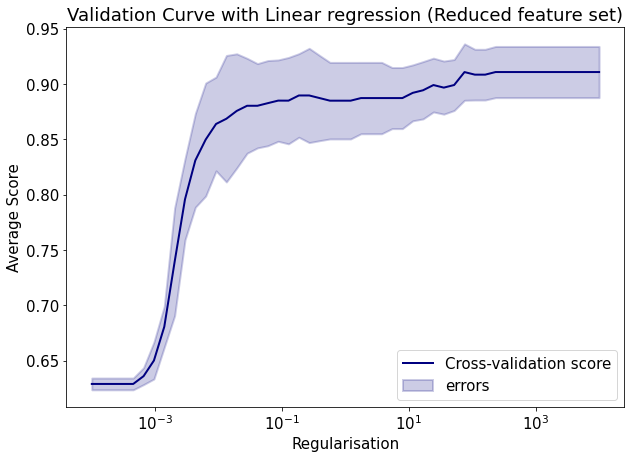

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# YOUR CODE HERE
# reducing feature with 3 features
reduce_X_tr=X_train[:,0:3]
reduce_X_te=X_test[:,0:3]
# recall logistic regression
lr = LogisticRegression(random_state=0, solver='lbfgs')

# regularlisation parameter
param_lr=np.logspace(-4,4,50)

# using cross validation with regularisation
param_grid={'C':param_lr, "penalty":['l2']}
gridcv=GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
gridcv.fit(reduce_X_tr,y_train)

# use the cross validation result and find uncertainty
g_mean=gridcv.cv_results_['mean_test_score']
g_std=gridcv.cv_results_['std_test_score']

# plot the graph
plt.figure(figsize =(10, 7))
plt.rc('font', size=15)
plt.title('Validation Curve with Linear regression (Reduced feature set)')
plt.xlabel('Regularisation')
plt.xscale('log')
plt.ylabel('Average Score')
lw = 2
plt.semilogx(param_lr, g_mean, label='Cross-validation score',color='navy', lw=lw)
plt.fill_between(param_lr, g_mean - g_std, g_mean + g_std, alpha=0.2, color='navy', lw=lw, label='errors')
plt.legend(loc=4)
plt.show()

**TASK 3:**

Use a logistic regression model to classify the data using the **full feature set**. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score using 5-fold cross validation. You might want to use `fill_between` for the uncertainties. Your plot should have appropriate labels. [5 marks]


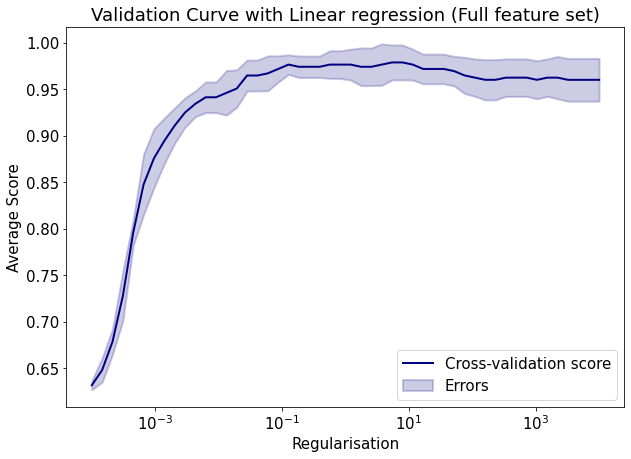

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')
# recall logistic regression
lr = LogisticRegression(random_state=0, solver='lbfgs')

# regularlisation parameter
param_lr=np.logspace(-4,4,50)

# using cross validation with regularisation
param_grid={'C':param_lr, "penalty":['l2']}
gridcv=GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
gridcv.fit(X_train,y_train)

# use the cross validation result and find uncertainty
g_mean=gridcv.cv_results_['mean_test_score']
g_std=gridcv.cv_results_['std_test_score']
# plot the graph
plt.figure(figsize =(10, 7))
plt.rc('font', size=15)
plt.title('Validation Curve with Linear regression (Full feature set)')
plt.xlabel('Regularisation')
plt.ylabel('Average Score')
lw = 2
plt.semilogx(param_lr, g_mean, label='Cross-validation score',color='navy', lw=lw)
plt.fill_between(param_lr, g_mean - g_std, g_mean + g_std, alpha=0.2, color='navy', lw=lw, label='Errors')
plt.legend(loc=4)
plt.show()

**TASK 4:**

Using the test set, plot the ROC curve (true positive rate vs false positive rate) for the two models above to compare their performance. [4 marks]


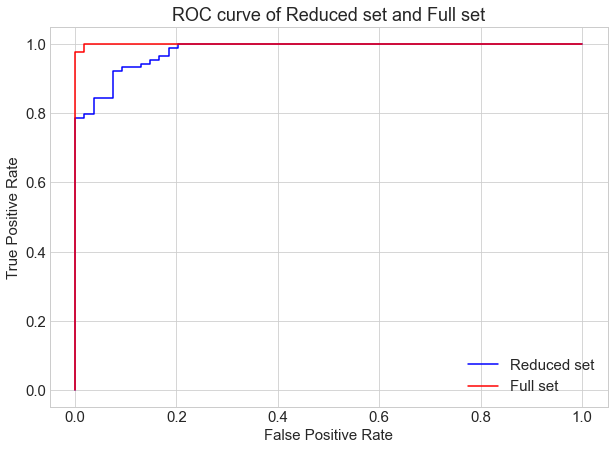

In [6]:
from sklearn.metrics import roc_curve

# YOUR CODE HERE
# fitting reduced and full feature to find decision boundary with decision function
lr.fit(reduce_X_te,y_test)
res_lr = lr.decision_function(reduce_X_te)
lr.fit(X_test,y_test)
res_lrt = lr.decision_function(X_test)
# to calculate ROC curve element
fpr,tpr, threshold = roc_curve(y_test,res_lr)
fprt,tprt, thresholdt = roc_curve(y_test,res_lrt)
# plot ROC curve
plt.figure(figsize =(10, 7))
plt.rc('font', size=15)
plt.style.use('seaborn-whitegrid')
plt.title('ROC curve of Reduced set and Full set')
plt.plot(fpr,tpr, color='b', label='Reduced set')
plt.plot(fprt,tprt, color='r', label='Full set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

**TASK 5:**

Thinking about a situation where we can use the two models as diagnostic in practice, we can imagine that the reduced feature set model would be a quick test, as it relies on fewer features, while the full feature set model would require more individual tests to be performed on a patient. For this task we consider the following diagnostic: first we perform a classification using the "quick" diagnostic using the reduced feature set model, if the decision function comes within one unit of the decision boundary (i.e. the model is not very confident of its answer) we perform the more thorough test using the full feature set, fixing the decision boundary for the full feature set model at 0. Produce a ROC curve for this diagnostic strategy and show it on a plot together with the ROC curve for the two models above. [8 marks]


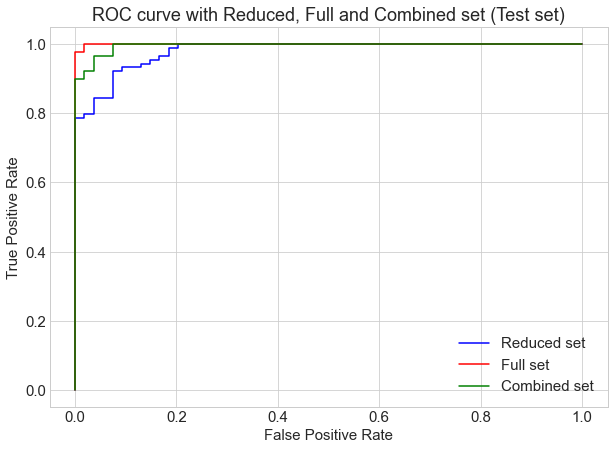

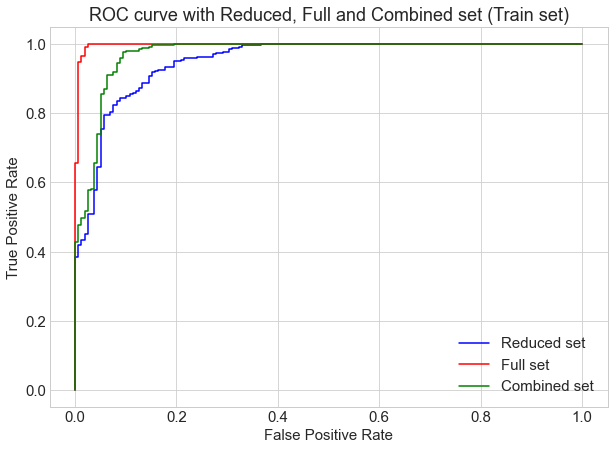

In [7]:
# YOUR CODE HERE
# linear regression , decision function (decision boundary within -1 ~1 is not confident in this question (usually 90% over))
# reduced feature(cheap) could found patient cancer - (if it is confidnet (over -1~1 boundary)(if it is not confident do full scan with full feature))
# fitting reduced and full feature to find decision boundary with decision function
lr.fit(reduce_X_te,y_test)
res_lr = lr.decision_function(reduce_X_te)
lr.fit(X_test,y_test)
res_lrt = lr.decision_function(X_test)
# boolean mask
# with boolean mask it operate like filter
combine=np.array(res_lr)
# combine full feature in the reduced feature within -1~1 boundary
combine[np.abs(res_lr)<1]=res_lrt[np.abs(res_lr)<1]
# to calculate ROC curve element
fpr,tpr, threshold = roc_curve(y_test,res_lr)
fprt,tprt, thresholdt = roc_curve(y_test,res_lrt)
fprc,tprc, thresholdc = roc_curve(y_test,combine)
# plot ROC curve
plt.figure(figsize =(10, 7))
plt.rc('font', size=15)
plt.style.use('seaborn-whitegrid')
plt.title('ROC curve with Reduced, Full and Combined set (Test set)')
plt.plot(fpr,tpr, color='b', label='Reduced set')
plt.plot(fprt,tprt, color='r', label='Full set')
plt.plot(fprc,tprc, color='g', label='Combined set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

#fit with train set
lr.fit(reduce_X_tr,y_train)
res_lr = lr.decision_function(reduce_X_tr)
lr.fit(X_train,y_train)
res_lrt = lr.decision_function(X_train)
# boolean mask
# with boolean mask it operate like filter
combine=np.array(res_lr)
# combine full feature in the reduced feature within -1~1 boundary
combine[np.abs(res_lr)<1]=res_lrt[np.abs(res_lr)<1]
# to calculate ROC curve element
fpr,tpr, threshold = roc_curve(y_train,res_lr)
fprt,tprt, thresholdt = roc_curve(y_train,res_lrt)
fprc,tprc, thresholdc = roc_curve(y_train,combine)
# plot ROC curve
plt.figure(figsize =(10, 7))
plt.rc('font', size=15)
plt.style.use('seaborn-whitegrid')
plt.title('ROC curve with Reduced, Full and Combined set (Train set)')
plt.plot(fpr,tpr, color='b', label='Reduced set')
plt.plot(fprt,tprt, color='r', label='Full set')
plt.plot(fprc,tprc, color='g', label='Combined set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

**TASK 6:**

Consider the following models:

- a neural network with 4 hidden layers with each 4 nodes with sigmoid activation function,
- a $k$-neighbors model with $k=5$
- a Support Vector Machine.

Use each of these model to fit the data using the full feature set. Using 5-fold cross validation make an estimate of the expected score and its uncertainty. Show your results in an error bar plot. Use cross validation to select paramters if necessary. [15 marks]


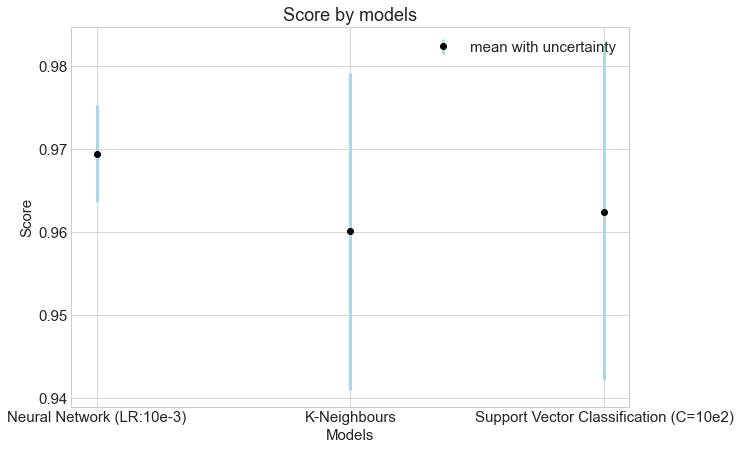

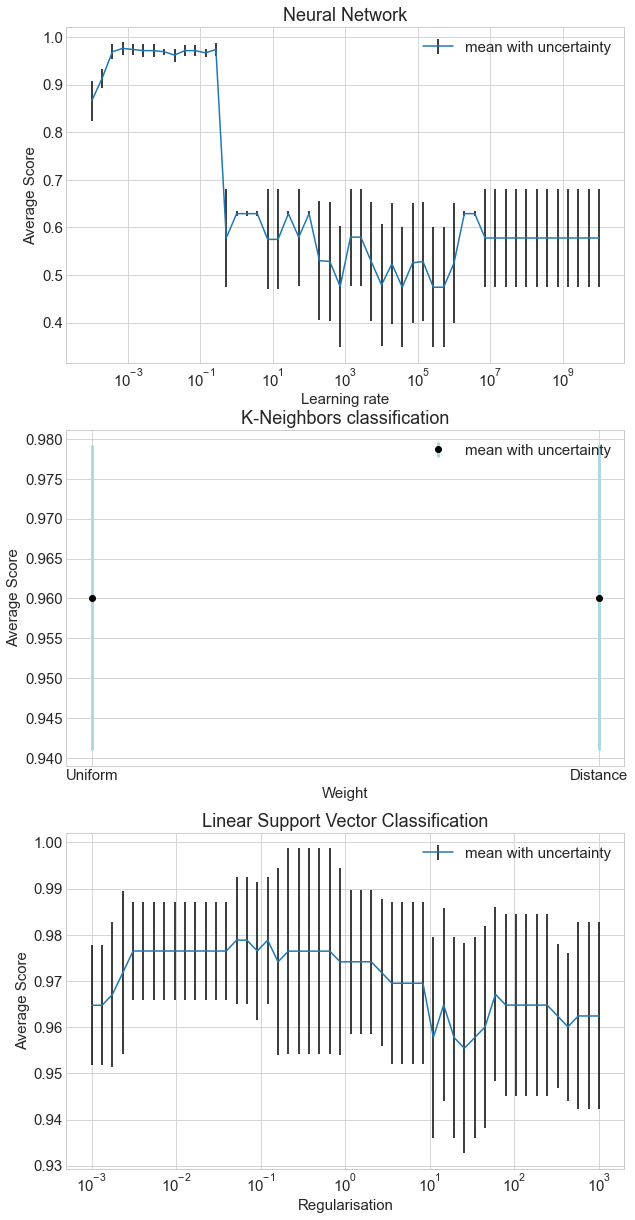

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# YOUR CODE HERE
warnings.filterwarnings('ignore')

# Using MLPclassifier to fit the train data for get cross validation score
NN_cla = MLPClassifier(random_state=15, max_iter=300, hidden_layer_sizes=(4,4,4,4), learning_rate_init=10e-3)
NN_cla.fit(X_train,y_train)
NN_cross=cross_val_score(NN_cla,X_train,y_train,cv=5,scoring='accuracy')

# Using KNeighbor classification to fit the train data for get cross validation score
KN_cla = KNeighborsClassifier(n_neighbors=5, weights='uniform')
KN_cla.fit(X_train,y_train)
KN_cross=cross_val_score(KN_cla,X_train,y_train,cv=5,scoring='accuracy')

# Using Linear SVC to fit the train data for get cross validation score
SV_cla = LinearSVC(random_state=15, C=10e2)
SV_cla.fit(X_train,y_train)
SV_cross=cross_val_score(SV_cla,X_train,y_train,cv=5,scoring='accuracy')

mean=[np.mean(NN_cross),np.mean(KN_cross),np.mean(SV_cross)]
std=[np.std(NN_cross),np.std(KN_cross),np.std(SV_cross)]
name=['Neural Network','K_Neighbours','Support Vector Classification']

# plot setting
fig, ax = plt.subplots(1, 1, figsize=(10,7))
plt.rc('font', size=15)
# Creating axes instance
#ax = fig.add_axes([0, 0, 1, 1])
# Creating boxplot for specific data
#bp = ax.boxplot([NN_cross, KN_cross, SV_cross],showmeans=True) # Min, max, mean, median, outlier values are represent
ax.errorbar(name,mean,yerr=std,fmt='o', color='black', ecolor='lightblue', elinewidth=3, capsize=0,label='mean with uncertainty')
ax.set_title('Score by models')
ax.set_xticklabels(["Neural Network (LR:10e-3)", "K-Neighbours", "Support Vector Classification (C=10e2)"])
ax.set_xlabel("Models")
ax.set_ylabel("Score")
# for legend
#ax.plot([], [], '^', linewidth=1, color='g', label='mean')
#ax.plot([], [], '-', linewidth=1, color='orange', label='median')
#ax.plot([], [], 'o', linewidth=1, color='black', label='outlier',mfc='none')
ax.legend(loc='best')
# show plot
plt.show()

# other version of error bar result
# set the parameter of Neural network
param_nn=np.logspace(-4,10,50)
NN_m=[]
NN_s=[]
# run the fit several times to store score values (learning rate parameter)
for i in param_nn:
    NN_cla = MLPClassifier(random_state=15, max_iter=300, hidden_layer_sizes=(4,4,4,4), learning_rate_init=i)
    NN_cla.fit(X_train,y_train)
    NN_cross=cross_val_score(NN_cla,X_train,y_train,cv=5,scoring='accuracy')
    NN_m.append(np.mean(NN_cross))
    NN_s.append(np.std(NN_cross))

# set the parameter of K neibors (changerble parameters are two)
param_kn=['uniform','distance']
KN_cross={}
# run the fit several times to store score values
for i in param_kn:
    KN_cla = KNeighborsClassifier(n_neighbors=5, weights=i)
    KN_cla.fit(X_train,y_train)
    KN_cross[i]=cross_val_score(KN_cla,X_train,y_train,cv=5,scoring='accuracy')
knmean=[np.mean(KN_cross['uniform']),np.mean(KN_cross['distance'])]
knstd=np.std(KN_cross['uniform']),np.std(KN_cross['distance'])

#set the parameter of Linear SVC (regularlisation parameter)
param_sv=np.logspace(-3,3,50)
SV_m=[]
SV_s=[]
# rn the fit several times to store score values
for i in param_sv:
    SV_cla = LinearSVC(random_state=15, C=i)
    SV_cla.fit(X_train,y_train)
    SV_cross=cross_val_score(SV_cla,X_train,y_train,cv=5,scoring='accuracy')
    SV_m.append(np.mean(SV_cross))
    SV_s.append(np.std(SV_cross))

# plot setting
fig, ax = plt.subplots(3, 1, figsize=(10,21))
#plot errorbar graph of neural network with learning rate function
ax[0].errorbar(param_nn, np.array(NN_m),yerr=np.array(NN_s), label='mean with uncertainty',ecolor='black')
ax[0].set_title('Neural Network')
ax[0].set_xlabel('Learning rate')
ax[0].set_xscale('log')
ax[0].set_ylabel('Average Score')
ax[0].legend(loc='best')

#plot boxplot graph of k neighbor
#ax[1].boxplot([KN_cross['uniform'],KN_cross['distance']],showmeans=True)
ax[1].errorbar(param_kn,knmean,yerr=knstd,fmt='o', color='black', ecolor='lightblue', elinewidth=3, capsize=0,label='mean with uncertainty')
ax[1].set_xticklabels(["Uniform", "Distance"])
ax[1].set_title('K-Neighbors classification')
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('Average Score')
#ax[1].plot([], [], '^', linewidth=1, color='g', label='mean')
#ax[1].plot([], [], '-', linewidth=1, color='orange', label='median')
#ax[1].plot([], [], 'o', linewidth=1, color='black', label='outlier',mfc='none')
ax[1].legend(loc='best')

#plot errorbar graph of Linear SVC with regularlisation function
ax[2].errorbar(param_sv, np.array(SV_m),yerr=np.array(SV_s), label='mean with uncertainty',ecolor='black')
ax[2].set_title('Linear Support Vector Classification')
ax[2].set_xlabel('Regularisation')
ax[2].set_xscale('log')
ax[2].set_ylabel('Average Score')
ax[2].legend(loc='best')
fig.show()